In [209]:
# Setup
import pandas as pd
import numpy as np

In [210]:
#setup to download data directly from the databank
import pandas_datareader
import datetime

In [211]:
#setup to download data directly from world data bank
from pandas_datareader import wb

In [212]:
#define countries we are looking for
countries = ["CN","JP","BR","US","DK","ES","TM","IN","NG"]

In [213]:
#define indicator
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.POP.TOTL":"Population total", 
              "SP.URB.TOTL.IN.ZS":"Urban Population in %", "SP.DYN.TFRT.IN":"Fertility Rate", "SE.ADT.LITR.ZS": "Literacy rate, adult total in %" }

In [214]:
#example download world data bank shown in the lecture
data_wb = wb.download(indicator= indicators, country= countries, start=1990, end=2017)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_pC","NY.GDP.MKTP.CD":"gdp", "SP.POP.TOTL":"pop", "SP.URB.TOTL.IN.ZS":"urban_pop%", 
                                    "SP.DYN.TFRT.IN":"frt", "SE.ADT.LITR.ZS":"litr"})
data_wb = data_wb.reset_index()
data_wb.head(-5)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,10888.982385,2.055506e+12,209288278,86.309,NaN,NaN
1,Brazil,2016,10868.653444,1.793989e+12,207652865,86.042,1.7260,NaN
2,Brazil,2015,11351.565748,1.802214e+12,205962108,85.770,1.7400,92.04790
3,Brazil,2014,11870.148408,2.455994e+12,204213133,85.492,1.7530,91.72943
4,Brazil,2013,11915.417054,2.472807e+12,202408632,85.209,1.7650,91.48424
5,Brazil,2012,11673.770536,2.465189e+12,200560983,84.923,1.7770,91.33785
6,Brazil,2011,11560.418751,2.616202e+12,198686688,84.631,1.7900,91.41124
7,Brazil,2010,11224.154083,2.208872e+12,196796269,84.335,1.8050,90.37918
8,Brazil,2009,10538.778282,1.667020e+12,194895996,84.044,1.8240,90.29821
9,Brazil,2008,10656.869466,1.695825e+12,192979029,83.749,1.8510,90.03662


In [215]:
#Tonje 
data_wb.dtypes

country        object
year           object
gdp_pC        float64
gdp           float64
pop             int64
urban_pop%    float64
frt           float64
litr          float64
dtype: object

In [216]:
# Bianca
#to round all the numbers:
round(data_wb.head(),2)


,country,year,gdp_pC,gdp,pop,urban_pop%,frt,litr
0,Brazil,2017,10888.98,2.055506e+12,209288278,86.31,NaN,NaN
1,Brazil,2016,10868.65,1.793989e+12,207652865,86.04,1.73,NaN
2,Brazil,2015,11351.57,1.802214e+12,205962108,85.77,1.74,92.05
3,Brazil,2014,11870.15,2.455994e+12,204213133,85.49,1.75,91.73
4,Brazil,2013,11915.42,2.472807e+12,202408632,85.21,1.76,91.48


In [217]:
# save datasheet as excel (just to see it)_index=false to avoid saving the index
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
data_wb.to_excel(r"C:\Users\Lisa1\Desktop\MarieDokumente\Uni\Master\VWL\Phython Introduction\project_1\data_wb.xlsx")

In [218]:
data_wb.shape

(252, 8)

In [219]:
#summary statistics
round(data_wb.describe(),2)

,gdp_pC,gdp,pop,urban_pop%,frt,litr
count,252.00,2.520000e+02,2.520000e+02,252.00,243.00,37.00
mean,21233.40,2.711959e+12,3.535354e+08,62.67,2.50,87.00
std,20848.11,4.160881e+12,4.643669e+08,22.31,1.43,15.39
min,530.89,2.378760e+09,3.683966e+06,25.55,1.13,48.22
25%,2131.25,2.756119e+11,4.001550e+07,42.57,1.55,88.62
50%,9117.39,6.845028e+11,1.336831e+08,76.10,1.93,91.48
75%,42252.61,3.939735e+12,3.099149e+08,81.58,2.86,97.75
max,61582.17,1.939060e+13,1.386395e+09,91.54,6.49,99.70


In [220]:
# detect for missing data
## count missing data
data_wb.isnull().sum().sum()

224

In [221]:
## number of observations
data_wb.count()

country       252
year          252
gdp_pC        252
gdp           252
pop           252
urban_pop%    252
frt           243
litr           37
dtype: int64

In [222]:
## missing value of each variable
data_wb.isnull().sum()

country         0
year            0
gdp_pC          0
gdp             0
pop             0
urban_pop%      0
frt             9
litr          215
dtype: int64

In [223]:
# drop litr
data_wb.drop(['litr'], axis = 1, inplace = True)

In [224]:
#search for the nine missing values in frt
round(data_wb.groupby('year').mean(),2)

,gdp_pC,gdp,pop,urban_pop%,frt
year,,,,,
1990,17322.45,1.220276e+12,2.967548e+08,57.06,2.98
1991,17480.06,1.308705e+12,3.014833e+08,57.39,2.92
1992,17614.30,1.377011e+12,3.060832e+08,57.71,2.86
1993,17609.77,1.465415e+12,3.106009e+08,58.04,2.79
1994,18033.67,1.598084e+12,3.151175e+08,58.36,2.73
1995,18406.36,1.757443e+12,3.196142e+08,58.70,2.67
1996,18865.59,1.768648e+12,3.240756e+08,59.06,2.61
1997,19293.24,1.788612e+12,3.285511e+08,59.42,2.57
1998,19603.76,1.809047e+12,3.329623e+08,59.78,2.53


In [225]:
#show frt only for 2017
data_wb.loc[data_wb['year'] == "2017", :].head(-1)

,country,year,gdp_pC,gdp,pop,urban_pop%,frt
0,Brazil,2017,10888.982385,2.055506e+12,209288278,86.309,NaN
28,China,2017,7329.089299,1.223770e+13,1386395000,57.960,NaN
56,Denmark,2017,61582.166069,3.248720e+11,5769603,87.757,NaN
84,Spain,2017,32405.750814,1.311320e+12,46572028,80.080,NaN
112,India,2017,1964.595183,2.600818e+12,1339180127,33.600,NaN
140,Japan,2017,48556.927245,4.872137e+12,126785797,91.535,NaN
168,Nigeria,2017,2412.202835,3.757455e+11,190886311,49.519,NaN
196,Turkmenistan,2017,7317.549506,3.792629e+10,5758075,51.153,NaN


In [226]:
# drop the year for which the data is missing 
I = data_wb['year'] == "2017"
data_wb.drop(data_wb[I].index, inplace = True)
# => data cleaning done

In [227]:
#summary statistics
data_wb.describe()

data_wb.count()
#=>data cleaning finished

country       243
year          243
gdp_pC        243
gdp           243
pop           243
urban_pop%    243
frt           243
dtype: int64

In [228]:
data_wb.shape

(243, 7)

In [143]:
# make some cool groupby things see lecture basic_data
##empl.groupby('municipality')['e'].mean().head(10)
##empl.groupby('year')['e'].mean().plot
# demean to compare it better
##stocks2.groupby('firm')['close_demeaned'].plot(legend=True); 
##plt.title('Stock price: deviation from time-average'); 
# perform summary statistics
## nameofdataset.describe()
# maybe create an interactive table for each country
##see load_save_and_structure_data
#correlation table?
# maybe perform a simple regression
# world maps as diagramm

#graphs -GDP and fertility rate 

In [230]:
#Tonje 
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 


In [231]:
#Tonje 
country=data_wb["country"]
year=data_wb["year"]
gdp_pC=data_wb["gdp_pC"]


In [307]:
#Tonje 
def interactive_figure(country, data_wb):
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_pC = data_country.gdp_pC
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(year, gdp_pC)
    ax.set_xlabel("Years")
    ax.set_ylabel("GDP per Capita")
    plt.xticks(rotation=90)
    plt.gca().invert_xaxis()



In [ ]:
#Tonje
#Just to check that it works for different inputs 
interactive_figure('Denmark',data_wb)
interactive_figure('Brazil',data_wb)



In [309]:
#Tonje
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_pC=widgets.fixed(gdp_pC)
);

interactive(children=(Dropdown(description='Country', options=('Brazil', 'China', 'Denmark', 'Spain', 'India',…

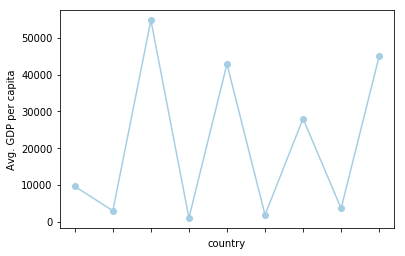

In [108]:
#Tonje
#Average GDP per capita?
ax = data_wb.groupby("country")['gdp_pC'].mean().plot(kind='line', style='-o'); 
ax.set_ylabel('Avg. GDP per capita'); 
